# Data Engineering - Filter interesting data

## Import librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [3]:
df = pd.read_csv('survey_results_public.csv')
print(len(df))
df.head()

73268


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


## Filter the column for the dataset of the first page

The input columns will be used as a filter. These are the columns to keep :

- YearsCodePro (Years of coding as a pro)
- EdLevel (Education level)
- Devtype (Development type)
- Country
- OrgSize (Organization Size)

The output columns to keep are :

- CompTotal (Total Salary)
- CompFreq (Annual or mensual salary)

These two columns can be broadcaster into one, for instance converting everything into an annual salary.

Additionnally, the following columns have to be filtered :

The MainBranch column will have to be filtered to only keep the line containing "I am a developer by profession".



In [4]:
# Filter the data to only keep profesionnal developers
print(len(df))
df_filtered = df[df['MainBranch'].str.contains("I am a developer by profession")]
print(len(df_filtered))

# Also filter to only relevants countries
def filter(df, column, filters):
    return df[df[column].isin(filters)]

countries = [
    'United States of America',
    'Switzerland',
    'United Kingdom of Great Britain and Northern Ireland',
    'France',
    'Germany',
    'Netherlands',
    'Spain',
    'Italy',
    'Austria',
    'Italy',
    'Canada',
    'Ireland',
    'Sweden',
    'Norway',
    'Australia',
    'Denmark'
]

df_filtered = filter(df_filtered,'Country',countries)

# df_filtered = df_filtered[df_filtered['Country'].str.contains("America")]

selectedInput = [
    'EdLevel',
    'DevType',
    'OrgSize',
    'Country',
    'YearsCodePro'
]
selectedOutput = [
    'CompTotal',
    'CompFreq'
]

df_features = df_filtered[selectedInput + selectedOutput]
# Remove row that have NaN salary
df_features = df_features[df_features['CompTotal'].notna()]
df_features = df_features[df_features['CompFreq'].notna()]

# Convert monthly salary to yearly, then drop the CompTotal and CompFreq columns
df_features['YearlySalary'] = df_features.apply(lambda row: float(row['CompTotal']) * 12 if row['CompFreq'] == "Monthly" else row['CompTotal'], axis=1)
df_features = df_features.drop(['CompTotal', 'CompFreq'] , axis=1)

# Filter outliers
min_yearly_salary = 0
max_yearly_salary = 1e7
df_features = df_features.loc[df_features['YearlySalary'] > min_yearly_salary]
df_features = df_features.loc[df_features['YearlySalary'] < max_yearly_salary]

print(len(df_features))

df_features

73268
53507
21113


,EdLevel,DevType,OrgSize,Country,YearsCodePro,YearlySalary
8,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",I don’t know,Netherlands,6,46000.0
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,2,48000.0
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",2 to 9 employees,United States of America,5,65000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,5,110000.0
17,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Engineer, data","1,000 to 4,999 employees",Austria,10,190000.0
...,...,...,...,...,...,...
73251,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack",20 to 99 employees,France,8,65000.0
73253,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",500 to 999 employees,Australia,3,121000.0
73261,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack","10,000 or more employees",France,2,36000.0
73264,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist,I don’t know,United States of America,5,107000.0


In [5]:
df_features['DevType'] = df_features['DevType'].str.split(';')
df_features = df_features.explode(['DevType'])
df_features

,EdLevel,DevType,OrgSize,Country,YearsCodePro,YearlySalary
8,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",I don’t know,Netherlands,6,46000.0
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",100 to 499 employees,United Kingdom of Great Britain and Northern I...,2,48000.0
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,2,48000.0
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",2 to 9 employees,United States of America,5,65000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack","5,000 to 9,999 employees",United States of America,5,110000.0
...,...,...,...,...,...,...
73253,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",500 to 999 employees,Australia,3,121000.0
73261,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack","10,000 or more employees",France,2,36000.0
73264,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist,I don’t know,United States of America,5,107000.0
73266,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",10 to 19 employees,United Kingdom of Great Britain and Northern I...,31,58500.0


# Export the CSV file

In [6]:
df_features.to_csv('salary_by_category.csv', sep=',', encoding='utf-8')

# Try Visualization

<AxesSubplot: xlabel='YearlySalary', ylabel='EdLevel'>

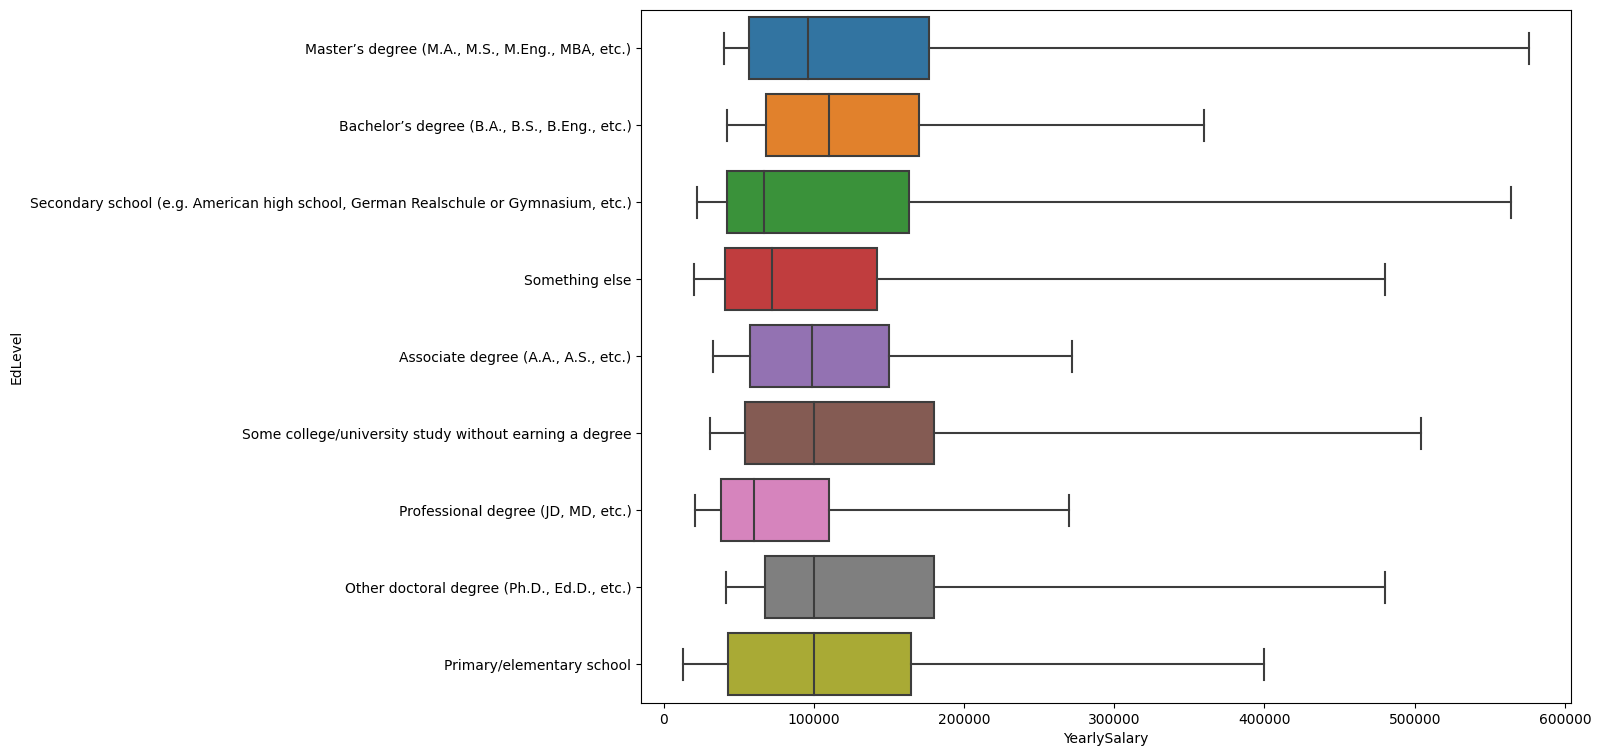

In [7]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='YearlySalary', y='EdLevel', data=df_features, showfliers=False, orient="h", whis=[10, 90])

In [8]:
# Get unique strings in the DevType column (especially useful for creating the dropmenu)
df_features['DevType'].str.split(';').explode().unique().tolist()

['Developer, back-end',
 'Developer, full-stack',
 'Academic researcher',
 'DevOps specialist',
 'Engineer, data',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Developer, front-end',
 'Developer, QA or test',
 'Database administrator',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Designer',
 'Student',
 'Engineering manager',
 'Project manager',
 'Product manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'System administrator',
 'Marketing or sales professional',
 'Data scientist or machine learning specialist',
 'Scientist',
 'Security professional',
 'Engineer, site reliability',
 'Educator',
 'Other (please specify):',
 'Blockchain',
 nan]

C:\Users\Antony\AppData\Local\Temp\ipykernel_7468\1931603437.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ds_years = df_ds.groupby(['YearsCodePro']).mean()


<AxesSubplot: xlabel='YearsCodePro'>

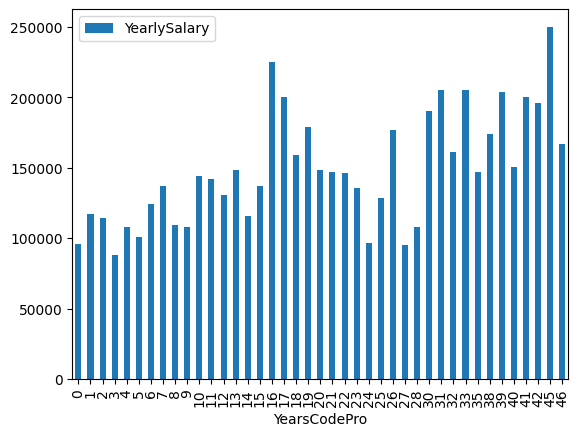

In [9]:
# Display the histogram for the Data Scientists
df_features['DevType'] = df_features['DevType'].fillna("")
df_ds = df_features[df_features['DevType'].str.contains("Data scientist")]
df_ds

# Filter the salary to remove the outliers
df_ds = df_ds.loc[df_ds['YearlySalary'] > df_ds.YearlySalary.quantile(0.1)]
df_ds = df_ds.loc[df_ds['YearlySalary'] < df_ds.YearlySalary.quantile(0.9)]

df_ds['YearsCodePro'] = df_ds['YearsCodePro'].str.replace('Less than 1 year', '0')
df_ds['YearsCodePro'] = pd.to_numeric(df_ds['YearsCodePro'])
df_ds = df_ds.sort_values(by=['YearsCodePro'])
df_ds_years = df_ds.groupby(['YearsCodePro']).mean()

df_ds_years.plot.bar()

,YearlySalary
0,96000.0
5,105000.0
10,116000.0
15,148000.0
20,150000.0


<AxesSubplot: >

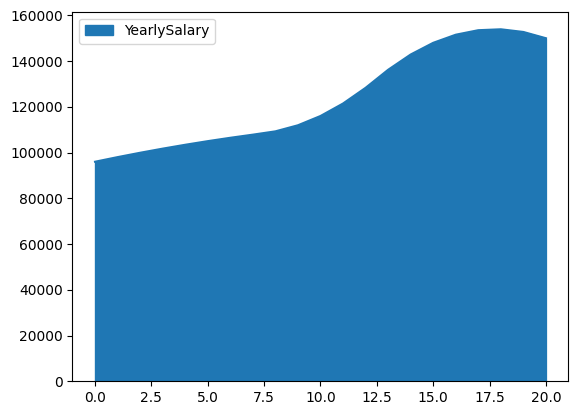

In [10]:
# Create a new dataframe, containing a smoothed experience by salary visualization.
# The point to display are : < 1, 1-4, 5-9, 10-19, 20+

df_exp = pd.DataFrame()
df_exp["YearlySalary"] = [df_ds.loc[df_ds["YearsCodePro"] == 0]["YearlySalary"].mean(),
                          df_ds.loc[df_ds["YearsCodePro"].between(1, 4, inclusive="both")]["YearlySalary"].mean(),
                          df_ds.loc[df_ds["YearsCodePro"].between(5, 9, inclusive="both")]["YearlySalary"].mean(),
                          df_ds.loc[df_ds["YearsCodePro"].between(10, 19, inclusive="both")]["YearlySalary"].mean(),
                          df_ds.loc[df_ds["YearsCodePro"] >= 20]["YearlySalary"].mean()]

df_exp.index = np.arange(0, 21, 5)
df_exp["YearlySalary"] = df_exp["YearlySalary"].round(-3)
display(df_exp)

from scipy.interpolate import interp1d
f1 = interp1d(np.arange(0, 21, 5), df_exp['YearlySalary'],kind='quadratic')

df_exp_inter = pd.DataFrame()
new_index = np.arange(21)
df_exp_inter.index = new_index
df_exp_inter['YearlySalary'] = f1(new_index)
df_exp_inter.plot.area()

In [11]:
import plotly.express as px
df = px.data.gapminder()
fig = px.area(df_exp, y='YearlySalary', range_y=[80e3,160e3], line_shape='spline' ,title="Data Scientist<br><sup>Pay by experience</sup>", width=750, height=500)
fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="y",
    xaxis_title="Experience",
    yaxis_title="Yearly Salary [$]",)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 5, 10, 15, 20],
        ticktext = ['< 1 yr', '1-4 yr', '5-9 yr', '10-19 yr', '20+ yr',]
    )
)

fig.show()